In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
#reading the data

df = pd.read_csv('Dataset/Reviews.csv')

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


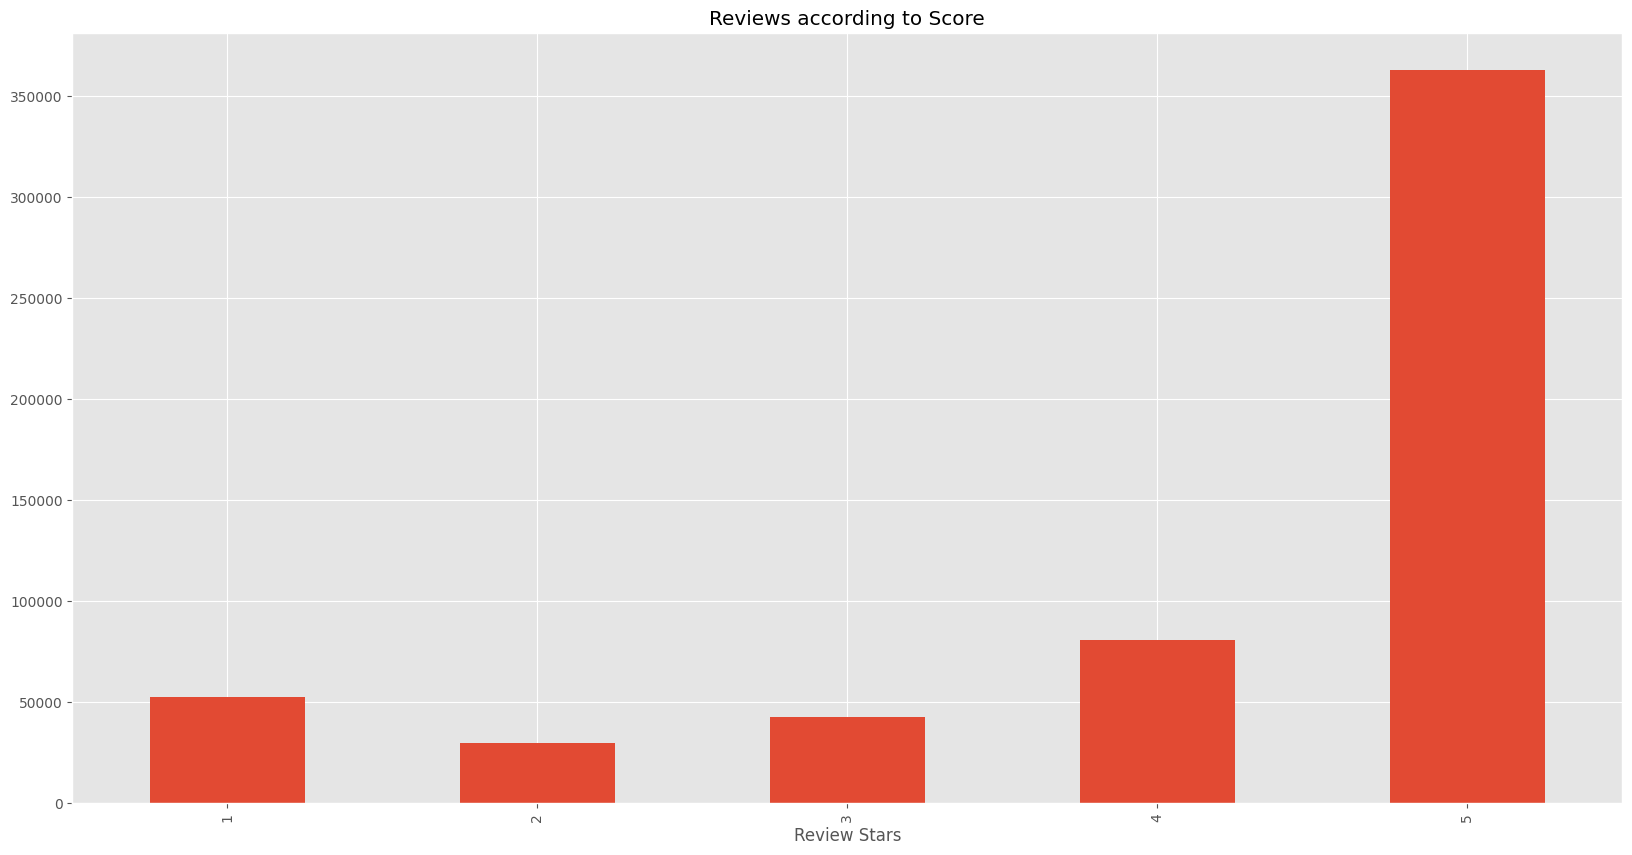

In [6]:
ax = df['Score'].value_counts().sort_index().plot(kind = 'bar', title = 'Reviews according to Score', figsize = (20, 10))
ax.set_xlabel('Review Stars')
plt.show()

In [7]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [8]:
print(df.shape)

(568454, 10)


# BASIC NLTK OPERATIONS

In [9]:
#lets take as single example

example = df['Text'][50]
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [10]:
tokens = nltk.word_tokenize(example) #we needto convert our text into a format that computer can interpret and tokenizing isthe way to do it.
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [11]:
#nltk can help in getting the text's part of speech

tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [12]:
#nltk can automatically extract some more interesting information about the text
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# Using NLTK 's VADER Scoring 

In [13]:
#To find out the positive, negative and neutral scores pf the specific sentence

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [14]:
SIA = SentimentIntensityAnalyzer()

In [15]:
#let's run it for a certain example

SIA.polarity_scores('I am doing really good.') #as you can say it says that it is a positive sentiment and the compound score tell that the value from -1 to 1, that is, it is positive so it is determining it as a positive sentiment

{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4927}

In [16]:
SIA.polarity_scores('That is too bad') #as you can say this time it is focusing onit ot be a negative sentiment

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

In [17]:
SIA.polarity_scores(example) #as you can see, on our example it says that it is a negative response

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [46]:
#we will need to run this analyzer on our dataset and store the values in a dictionary for further use
Results = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    my_id = row['Id']
    Results[my_id] = SIA.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [47]:
Results

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [57]:
Results_df = pd.DataFrame(Results).T

In [58]:
Results_df = Results_df.reset_index().rename(columns={'index': 'Id'})
Results_df = Results_df.merge(df, how='left')

In [59]:
Results_df.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


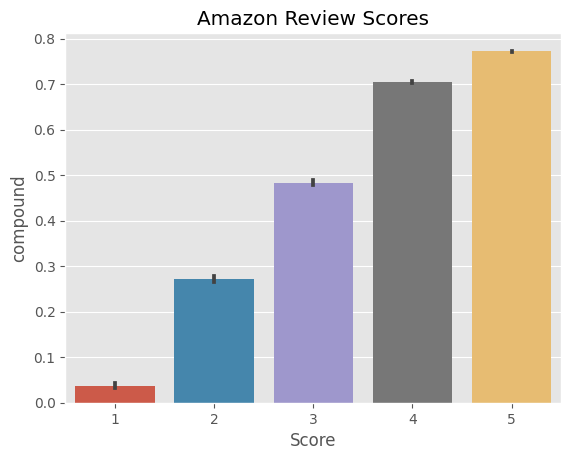

In [61]:
ax = sns.barplot(data = Results_df, x = 'Score', y = 'compound')
ax.set_title('Amazon Review Scores')
plt.show()

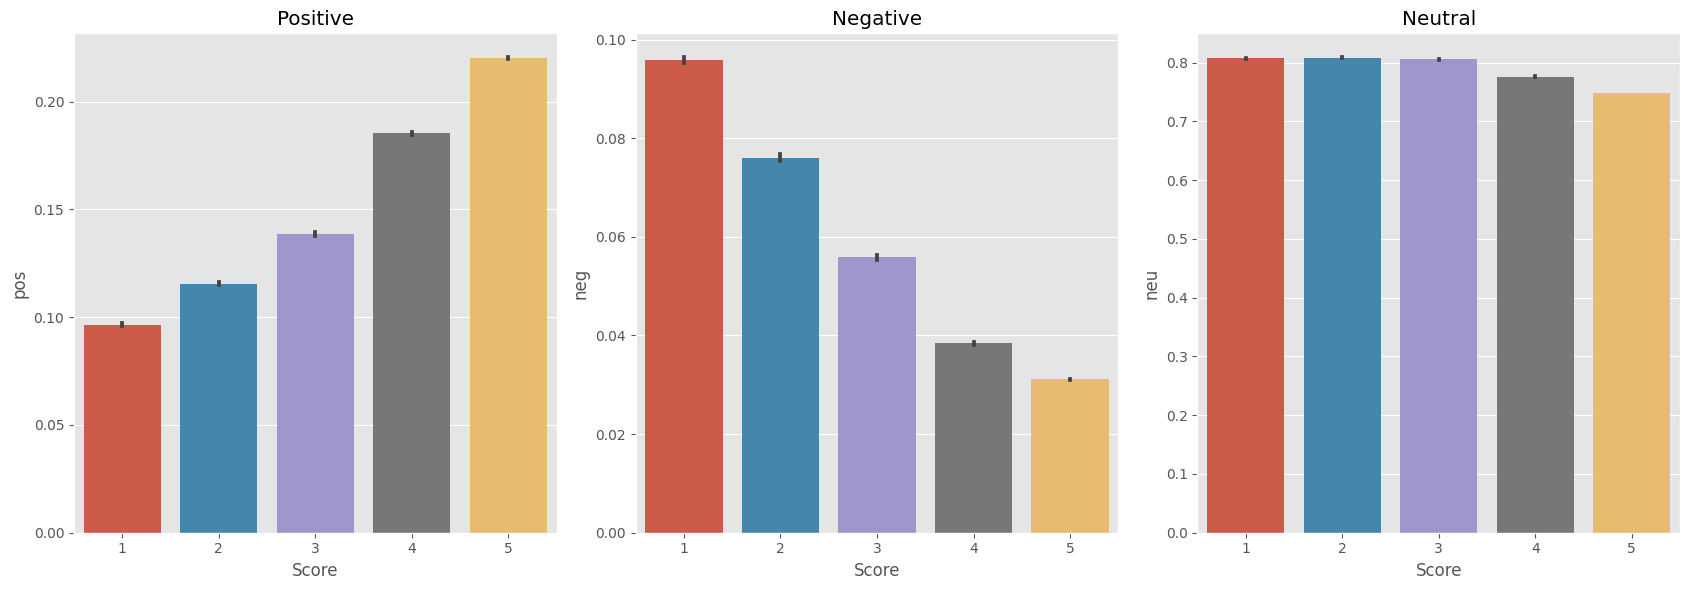

In [64]:
fig, axs = plt.subplots(1, 3, figsize = (17, 6))
sns.barplot(data = Results_df, x = 'Score', y = 'pos', ax = axs[0])
sns.barplot(data = Results_df, x = 'Score', y = 'neg', ax = axs[1])
sns.barplot(data = Results_df, x = 'Score', y = 'neu', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.tight_layout()
plt.show()

# Now let's use a Pre-trained model from huggingface library

In [3]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [23]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
Tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

In [24]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [30]:
encoded_text = Tokenizer(example, return_tensors='pt')

In [ ]:
output = model(**encoded_text)
output

In [34]:
Scores = output[0][0].detach().numpy()

In [37]:
Results = softmax(Scores)
Results

array([0.97635514, 0.02068746, 0.00295737], dtype=float32)

In [38]:
RESULTS = {
    
    'Negative_score' : Results[0],
    'Neutral_score' : Results[1],
    'Positive_score' : Results[2]
}

In [39]:
RESULTS

{'Negative_score': 0.97635514,
 'Neutral_score': 0.020687457,
 'Positive_score': 0.0029573673}

#  Sentiment Analysis on Yelp Restaurant Reviews

In [19]:
import requests
import re
from bs4 import BeautifulSoup
import torch

In [6]:
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
Tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

D:\PIYUSH_LAVANIYA_CMD\DEEP_LEARNING_Projects\Sentiment_Analysis\Sentiment_Analysis\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\om\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [12]:
YELP = requests.get('https://www.yelp.com/biz/toyama-sushi-san-francisco-2?osq=Japanese')
soup = BeautifulSoup(YELP.text, 'html.parser')
comments = re.compile('.*comment.*')
results = soup.find_all('p', {'class' : comments})       #p is the tag we are looking in
Reviews = [result.text for result in results]

In [14]:
Reviews

['Great casual, midrange Japanese restaurant for quick bento or more varied nigiri/omakase offerings. Came here with mom for a bite during the weekday and got the following:- Hamachi kama- agedashi tofu- beef teriyaki/sashimi combo - Dragon rollHamachi kama was on point: juicy, tender and perfectly grilled, paired with a lovely ponzu sauce. Their agedashi tofu recipe was pleasantly surprising too--larger than usual cubes of soft, silky tofu lightly battered and fried to perfection. We inhaled those. Will definitely be back to try more of the menu!',
 'Second time.Service staff was efficient.Ambiance is casual.Food was good. Portions were matching the price point.For the Chirashi, ingredients were fresh with a special seafood added, abalone. 10 pieces of seafood was laid on top of a large bed of rice.The bento included a salad, one salmon, rice, and tempura. Overall, the food was flavorful and filling.Give this place a shot.',
 "our first and last experience at Toyama sushi:Got seated r

In [15]:
df = pd.DataFrame(np.array(Reviews), columns = ['Review'])

In [16]:
df

,Review
0,"Great casual, midrange Japanese restaurant for..."
1,Second time.Service staff was efficient.Ambian...
2,our first and last experience at Toyama sushi:...
3,I came with some friends and let me just say t...
4,Had a less stellar time my last visit (service...
5,"New favorite sushi place in SF! Wow, my partne..."
6,Such a great spot tucked away in the inner Ric...
7,I was craving sushi and started running throug...
8,"Casual, affordable Japanese restaurant in the ..."
9,Great service with lots of street parking. I c...


In [17]:
df['Review'][0]

'Great casual, midrange Japanese restaurant for quick bento or more varied nigiri/omakase offerings. Came here with mom for a bite during the weekday and got the following:- Hamachi kama- agedashi tofu- beef teriyaki/sashimi combo - Dragon rollHamachi kama was on point: juicy, tender and perfectly grilled, paired with a lovely ponzu sauce. Their agedashi tofu recipe was pleasantly surprising too--larger than usual cubes of soft, silky tofu lightly battered and fried to perfection. We inhaled those. Will definitely be back to try more of the menu!'

In [25]:
def sentiment_score(review):
    tokens = Tokenizer.encode(review, return_tensors = 'pt')
    sentiment_score = model(tokens)
    return int(torch.argmax(sentiment_score.logits)) + 1

In [26]:
df['Sentiment_Scores'] = df['Review'].apply(lambda x : sentiment_score(x[: 512])) 

In [38]:
df

,Review,Sentiment_Scores
0,"Great casual, midrange Japanese restaurant for...",4
1,Second time.Service staff was efficient.Ambian...,4
2,our first and last experience at Toyama sushi:...,4
3,I came with some friends and let me just say t...,2
4,Had a less stellar time my last visit (service...,4
5,"New favorite sushi place in SF! Wow, my partne...",5
6,Such a great spot tucked away in the inner Ric...,5
7,I was craving sushi and started running throug...,4
8,"Casual, affordable Japanese restaurant in the ...",4
9,Great service with lots of street parking. I c...,5


In [43]:
df['Review'][3]

"I came with some friends and let me just say that the omakase here is worth it - especially for the price! It does take awhile but I understand why and here it comes out all at once instead of one by one. A lot of different flavors and variety. They don't skimp out either. No directions on the order to eat them so kinda just went for it. Everything melted in my mouth.It's a quaint sushi spot in Inner Richmond with kind service. Would come back!"

In [44]:
df['Sentiment_Scores'][3]

2